In [22]:
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random

#Build a simple data set with y = x + random
nPoints = 1000
#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
#print(xPlot)
#x needs to be list of lists.
x = [[s] for s in xPlot]
print(x)
#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]
#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]
#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]


[[-0.5], [-0.499], [-0.498], [-0.497], [-0.496], [-0.495], [-0.494], [-0.493], [-0.492], [-0.491], [-0.49], [-0.489], [-0.488], [-0.487], [-0.486], [-0.485], [-0.484], [-0.483], [-0.482], [-0.481], [-0.48], [-0.479], [-0.478], [-0.477], [-0.476], [-0.475], [-0.474], [-0.473], [-0.472], [-0.471], [-0.47], [-0.469], [-0.46799999999999997], [-0.46699999999999997], [-0.46599999999999997], [-0.46499999999999997], [-0.464], [-0.463], [-0.462], [-0.461], [-0.46], [-0.459], [-0.458], [-0.457], [-0.456], [-0.455], [-0.454], [-0.453], [-0.452], [-0.451], [-0.45], [-0.449], [-0.448], [-0.447], [-0.446], [-0.445], [-0.444], [-0.443], [-0.442], [-0.441], [-0.44], [-0.439], [-0.438], [-0.437], [-0.436], [-0.435], [-0.434], [-0.433], [-0.432], [-0.431], [-0.43], [-0.429], [-0.428], [-0.427], [-0.426], [-0.425], [-0.424], [-0.423], [-0.422], [-0.421], [-0.42], [-0.419], [-0.418], [-0.417], [-0.416], [-0.415], [-0.41400000000000003], [-0.41300000000000003], [-0.41200000000000003], [-0.41100000000000003

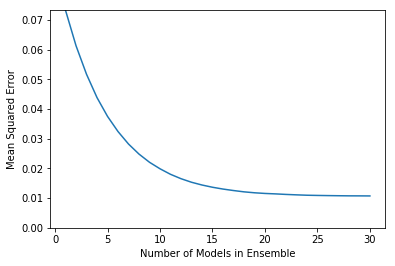

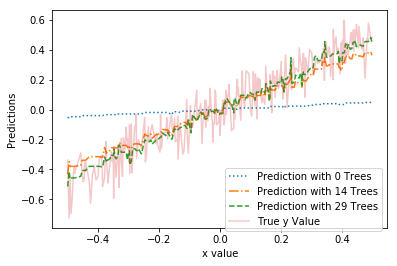

In [28]:
#maximum number of models to generate
numTreesMax = 30
#tree depth - typically at the high end
treeDepth = 5
#initialize a list to hold models
modelList = []
predList = []
eps = 0.1 # gradient descent step size controller
#initialize residuals to be the labels y
residuals = list(yTrain)
for iTrees in range(numTreesMax):
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals) # here residuals = yTrain
    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)
    #use new predictions to update residuals
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]
    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))
    #build cumulative prediction from first "n" models
    mse = []
    allPredictions = []
    for iModels in range(len(modelList)):
        #add the first "iModels" of the predictions and multiply by eps
        prediction = []
        for iPred in range(len(xTest)):
            prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)
        allPredictions.append(prediction)
        errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
        mse.append(sum([e * e for e in errors]) / len(yTest))
      
nModels = [i + 1 for i in range(len(modelList))]
plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()
plotList = [0, 14, 29]
lineType = [':', '-.', '--']
plot.figure()
for i in range(len(plotList)):
    iPlot = plotList[i]
    textLegend = 'Prediction with ' + str(iPlot) + ' Trees'
    plot.plot(xTest, allPredictions[iPlot], label = textLegend,
        linestyle = lineType[i])
plot.plot(xTest, yTest, label='True y Value', alpha=0.25)
plot.legend(bbox_to_anchor=(1,0.3))
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()